In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Survey = pd.read_csv('ACME-HappinessSurvey2020.csv')
#As long as my notebook path lies within the same location as my Data file pathm I'm OK! Otherwise i need to specify CSV path.

In [3]:
Survey.info()
#7 columns in total, 126 entries for each, no null values, data seems OK!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


<Axes: xlabel='Y', ylabel='count'>

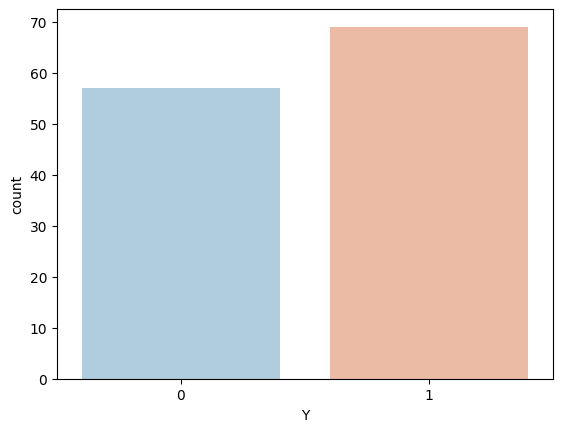

In [4]:
sns.countplot(x= Survey['Y'] , data = Survey , palette = 'RdBu_r')

<Axes: >

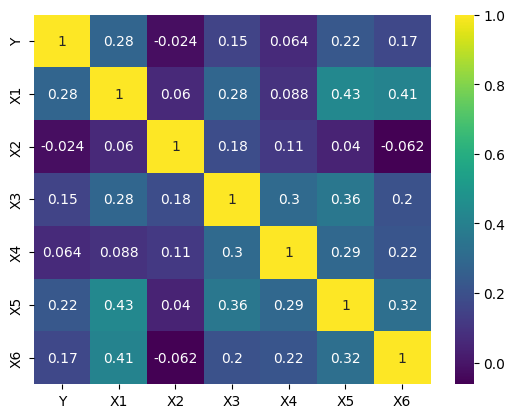

In [5]:
sns.heatmap(Survey.corr() , cmap = 'viridis', annot = True )

<Axes: >

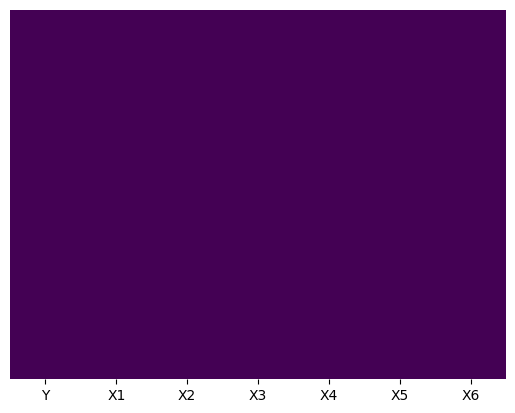

In [6]:
sns.heatmap(Survey.isnull() , yticklabels = False , cbar = False, cmap = 'viridis')
#No nall data

In [7]:
#Should all features be in numeric form?
#What are types of Logistics Regression?
#I understand that this is a "BINARY Clssification" Problem which can be solved using Supervised Learning -> Classification -> Logistics Regression
#Since Data is being classified into two categories (Happy vs Unhappy). How about Multi Classification?
#Should i be using logistics regression, or Linear Regression (Doesn't Y here depend on X1-X5?) 
#My assumption is Logistic Regression Since Y Can take only Discreat Values (0 OR 1). 
#The target variable(or output), y, can take only discrete values for a given set of features(or inputs), X.

In [8]:
#Split Lables from Features

In [9]:
#Features
X= Survey.drop(['Y'], axis = 1)

In [10]:
#Lables
y= Survey['Y']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#SHUFFLE DATA FOR SPLITTING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn= KNeighborsClassifier()


In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
y_predict = knn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
CR = classification_report(y_test, y_predict)
CM = confusion_matrix(y_test, y_predict)

In [19]:
print(CR)
print(CM)

              precision    recall  f1-score   support

           0       0.57      0.36      0.44        11
           1       0.63      0.80      0.71        15

    accuracy                           0.62        26
   macro avg       0.60      0.58      0.58        26
weighted avg       0.61      0.62      0.60        26

[[ 4  7]
 [ 3 12]]


In [20]:
param_grid = { "n_neighbors": range (1, 30, 2),
               "weights": ['uniform', 'distance'],
               "metric": ['euclidean' , 'manhattan' , 'minkowski'],
               #"algorithm": ["auto" , "ball_tree", "kd_tree", "brute"],
               "leaf_size": range(1, 50, 5)
             }

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold , GridSearchCV
seed = 42

In [22]:
#Grid Search
knn2 = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = seed)
grid_search = GridSearchCV(estimator = knn2, param_grid = param_grid, n_jobs = 1, cv = cv, scoring = "accuracy", error_score = 0)
grid_results = grid_search.fit(X_train, y_train)

In [23]:
#Best model
final_model = knn2.set_params(**grid_results.best_params_)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [24]:
#Summarize data
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test, y_pred) , confusion_matrix(y_test, y_pred))
print(grid_results.best_params_)

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.76      0.87      0.81        15

    accuracy                           0.77        26
   macro avg       0.77      0.75      0.76        26
weighted avg       0.77      0.77      0.76        26
 [[ 7  4]
 [ 2 13]]
{'leaf_size': 26, 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [25]:
print('Accuracy after tunning : ', (7 + 13)/(7 + 13 + 4 + 2))

Accuracy after tunning :  0.7692307692307693
